### Ein-Stichproben-t-Test als Modell

Wir betrachten einen Ein-Stichproben-t-Test gegen einen festen Referenzwert $\mu_0$.
Der Test beantwortet eine einzige Frage:

> Wo liegt der beobachtete t-Wert innerhalb der t-Verteilung,
> die unter der Annahme $H_0:\ \mu=\mu_0$ gilt?

Damit werden sichtbar:
- Modell (t-Verteilung mit $df=n-1$)
- Ablehnungsbereich (abhängig von $\alpha$ und der Testseite)
- beobachteter Wert $t_{\text{obs}}$
- p-Wert als Fläche unter der Kurve

**Experiment:**
Ändere $\alpha$, die Testseite oder die Daten.
Beobachte, was sich an Ablehnungsbereich, p-Wert und Entscheidung ändert –
und was gleich bleibt.



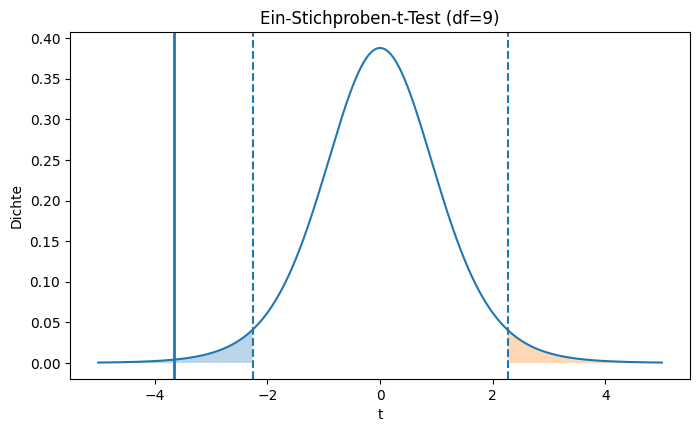

Ein-Stichproben-t-Test
----------------------
Beobachtete Daten: [122 125 130 128 127 126 124 129 131 123]
Datenumfang n        = 10
Referenzwert mu0     = 130
Stichprobenmittel    = 126.500
Stichproben-SD       = 3.028

Testseite            = two-sided
Signifikanzniveau α  = 0.05
Freiheitsgrade df    = 9

Beobachteter t-Wert  = -3.656
Kritischer t-Wert    = 2.262
p-Wert               = 0.0053


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----------------------------
# Eingaben
# ----------------------------
data = np.array([122, 125, 130, 128, 127, 126, 124, 129, 131, 123])
mu0 = 130          # Referenzwert
alpha = 0.05
side = "two-sided"   # "two-sided", "left", "right"

# ----------------------------
# Teststatistik
# ----------------------------
n = len(data)
xbar = data.mean()
s = data.std(ddof=1)
t_obs = (xbar - mu0) / (s / np.sqrt(n))
df = n - 1

# Kritische Werte und p-Wert
if side == "two-sided":
    t_crit = stats.t.ppf(1 - alpha/2, df)
    p_value = 2 * stats.t.sf(abs(t_obs), df)
elif side == "right":
    t_crit = stats.t.ppf(1 - alpha, df)
    p_value = stats.t.sf(t_obs, df)
else:  # left
    t_crit = stats.t.ppf(alpha, df)
    p_value = stats.t.cdf(t_obs, df)

# ----------------------------
# Grafik
# ----------------------------
x = np.linspace(-5, 5, 2000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(8, 4.5))
plt.plot(x, y)

# Ablehnungsbereich(e)
if side == "two-sided":
    plt.fill_between(x[x <= -t_crit], 0, y[x <= -t_crit], alpha=0.3)
    plt.fill_between(x[x >=  t_crit], 0, y[x >=  t_crit], alpha=0.3)
    plt.axvline(-t_crit, linestyle="--")
    plt.axvline( t_crit, linestyle="--")
elif side == "right":
    plt.fill_between(x[x >= t_crit], 0, y[x >= t_crit], alpha=0.3)
    plt.axvline(t_crit, linestyle="--")
else:
    plt.fill_between(x[x <= t_crit], 0, y[x <= t_crit], alpha=0.3)
    plt.axvline(t_crit, linestyle="--")

# Beobachteter t-Wert
plt.axvline(t_obs, linewidth=2)
plt.title(f"Ein-Stichproben-t-Test (df={df})")
plt.xlabel("t")
plt.ylabel("Dichte")
plt.savefig("ein_stichproben_ttest.pdf", bbox_inches="tight")
plt.show()

print("Ein-Stichproben-t-Test")
print("----------------------")
print(f"Beobachtete Daten: {data}")
print(f"Datenumfang n        = {n}")
print(f"Referenzwert mu0     = {mu0}")
print(f"Stichprobenmittel    = {xbar:.3f}")
print(f"Stichproben-SD       = {s:.3f}")
print()
print(f"Testseite            = {side}")
print(f"Signifikanzniveau α  = {alpha}")
print(f"Freiheitsgrade df    = {df}")
print()
print(f"Beobachteter t-Wert  = {t_obs:.3f}")
print(f"Kritischer t-Wert    = {t_crit:.3f}")
print(f"p-Wert               = {p_value:.4f}")

plt.close()